*De La Salle University – Dasmariñas*  
*College of Information and Computer Studies*

*S-CSIS311LA*  
*Introduction to Machine Learning (Laboratory)*

*Summative Assessment: Lab Exam*  
*Wednesday, October 9, 2024*

__Luis Anton P. Imperial__  
__BCS32__

# Case Study: Applying K-Nearest Neighbors and Linear Regression in a Laboratory Activity

This study looks at how to use K-Nearest Neighbors (KNN) and Linear Regression with the Student Performance dataset from the UCI Machine Learning Repository. It examines how well these methods predict student performance.

In education, being able to predict how students will perform can help teachers adjust their methods to improve results.

**Link to Dataset:** Student Performance Dataset,  
https://archive.ics.uci.edu/dataset/320/student+performance

The objective is to predict student grades based on various factors such as study time, attendance, and previous academic performance. This laboratory activity provides a practical comparison of these two machine learning algorithms.

## Dataset Features
The dataset contains the following features:

1. Study Time: Weekly study time (1 to 4).
2. Attendance: Percentage of classes attended.
3. Previous Grades: Average grades from previous terms.
4. Family Support: Family support level (binary: Yes/No).
5. Final Grade: The target variable representing the final grade (0-20).

## Methodology

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - Train the KNN model on the training set.
  - Predict final grades on the test set.
  - Evaluate performance
3. Linear Regression:
  - Fit a Linear Regression model to the training data.
  - Predict final grades on the test set.
  - Evaluate performance

## Implementation
**Tools:** Google Colab, Jupyter Notebook, Python with libraries such as pandas, NumPy, scikitlearn, and Matplotlib.

Display the prediction results for both models.  
Compare the two algorithms in a table.  
Conclusion.

In [5]:
# Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Methodology (1)

1. Data Preprocessing:
  - __Load the dataset and inspect for missing values.__
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)

In [6]:
#### 1. Load the dataset

import requests
import zipfile
import io

archive_file = "https://archive.ics.uci.edu/static/public/320/student+performance.zip"

response = requests.get(archive_file)
response.raise_for_status()

# Replace 'student+performance.zip' with the actual file name if different
with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
    with outer_zip.open('student.zip') as nested_zip_file:
        with zipfile.ZipFile(io.BytesIO(nested_zip_file.read())) as nested_zip:
            with nested_zip.open('student-mat.csv') as csv_file:
                dataset_file = io.BytesIO(csv_file.read())

In [7]:
#### 2. Load the data frame.head()
df = pd.read_csv(dataset_file, delimiter = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#### 3. Display dataframe information using df.info() and display df.head(10)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [9]:
##### This will show only features that have nonzero missing values.
df_na = df.isna().sum()
df_na

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Methodology (2)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - __Encode categorical variables (e.g., Family Support).__
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)

  > ### Dataset Features
  > The dataset contains the following features:
  >
  > 1. Study Time: Weekly study time (1 to 4).
  > 2. Attendance: Percentage of classes attended.
  > 3. Previous Grades: Average grades from previous terms.
  > 4. Family Support: Family support level (binary: Yes/No).
  > 5. Final Grade: The target variable representing the final grade (0-20).

So far, we have three pre-existing columns that already provide our necessary features, and two more that themselves must be created as dependents of other columns.

Feature Needed | Column from Dataset  | Possible Replacement
---------------|----------------------|-----
Study Time     | `studytime`          | N/A
Attendance     | ❌   | `absences` when converted
Previous Grades | ❌  | `G1` and `G2` when converted
Family Support  | `famsup`            | N/A
Final Grade     | `G3`                | N/A

### Create a new `attendance` column

In [10]:
#### 4. Create a new Attendance column based on existing Absences col

def calculate_attendance(df):
  """
  Calculates attendance percentage based on absences.

  Args:
    df: Pandas DataFrame containing the 'absences' column.

  Returns:
    Pandas DataFrame with an added 'attendance' column.
  """
  max_attendance = 93
  df['attendance'] = (max_attendance - df['absences']) / max_attendance * 100
  return df

df = calculate_attendance(df)
print(df[['absences', 'attendance']].head())

   absences  attendance
0         6   93.548387
1         4   95.698925
2        10   89.247312
3         2   97.849462
4         4   95.698925


### Create a new `previous_grades` column

In [11]:
df['previous_grades'] = (df['G1'] + df['G2']) / 2
print(df[['G1', 'G2', 'previous_grades']].head())


   G1  G2  previous_grades
0   5   6              5.5
1   5   5              5.0
2   7   8              7.5
3  15  14             14.5
4   6  10              8.0


### Print another information sheet

We need to check if all new columns have been generated without errors or disruption to downloaded data.

Let's run the `info()` function on the DataFrame a second time.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           395 non-null    object 
 1   sex              395 non-null    object 
 2   age              395 non-null    int64  
 3   address          395 non-null    object 
 4   famsize          395 non-null    object 
 5   Pstatus          395 non-null    object 
 6   Medu             395 non-null    int64  
 7   Fedu             395 non-null    int64  
 8   Mjob             395 non-null    object 
 9   Fjob             395 non-null    object 
 10  reason           395 non-null    object 
 11  guardian         395 non-null    object 
 12  traveltime       395 non-null    int64  
 13  studytime        395 non-null    int64  
 14  failures         395 non-null    int64  
 15  schoolsup        395 non-null    object 
 16  famsup           395 non-null    object 
 17  paid            

## Methodology (3)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - __Normalize numerical features for KNN.__
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)

In [13]:
#### Convert 'famsup' (Family Support) to numerical (1 for yes, 0 for no)
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})

In [14]:
#### Check new values for 'famsup' column
df['famsup']

0      0
1      1
2      0
3      1
4      1
      ..
390    1
391    0
392    0
393    0
394    0
Name: famsup, Length: 395, dtype: int64

###

### Defining test sizes

This dataset will be trained on the following test sizes.

Test Size Name | Train Size (%) | Test Size (%)
---|---|---
Extra Small | 80% (`0.80`) | 20% (`0.20`)
Medium | 70% (`0.70`) | 30% (`0.30`)
Large | 60% (`0.60`) | 40% (`0.40`)

*(Note that the default size for the test set is 25%.)*

In [15]:
test_size = {
    "x-small": 0.20,
    "medium": 0.30,
    "large": 0.40
}

### Defining the X and Y variables

The **X** (independent variables) consist of: `studytime`, `famsup`, `attendance`, `previous_grades`. The first two are truly exogenous, while the latter ones are themselves dependent on other variables.

The **Y** (dependent variable) consists of: `G3`. This is the final grade of each subject, which is issued at the third period of a three-period academic term.

In [16]:
X = df[['studytime', 'famsup', 'attendance', 'previous_grades']]
y = df['G3']

## Methodology (4–6)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - __Split the dataset into training (80%) and testing (20%) sets. (Record)__
  - __Split the dataset into training (70%) and testing (30%) sets. (Record)__
  - __Split the dataset into training (60%) and testing (40%) sets. (Record)__

In [17]:
from sklearn.model_selection import train_test_split

X_train_xsmall, X_test_xsmall, y_train_xsmall, y_test_xsmall = train_test_split(X, y, test_size=test_size["x-small"], random_state=42)
X_train_medium, X_test_medium, y_train_medium, y_test_medium = train_test_split(X, y, test_size=test_size["medium"], random_state=42)
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(X, y, test_size=test_size["large"], random_state=42)


## Methodology (7)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - __Determine an optimal value for K (number of neighbors).__
  - Train the KNN model on the training set.
  - Predict final grades on the test set.
  - Evaluate performance

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

def find_optimal_k(X_train, y_train, k_range):
  """
  Finds the optimal K for KNN using cross-validation.

  Args:
    X_train: Training features.
    y_train: Training target.
    k_range: Range of K values to test.

  Returns:
    Optimal K value.
  """
  best_k = None
  best_score = float('-inf')

  for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Use 5-fold cross-validation
    mean_score = np.mean(scores)

    if mean_score > best_score:
      best_score = mean_score
      best_k = k

  return best_k

# Define the range of K values to test (e.g., from 1 to 20)
k_range = range(1, 21)

# Find optimal K for each dataset
optimal_k_xsmall = find_optimal_k(X_train_xsmall, y_train_xsmall, k_range)
optimal_k_medium = find_optimal_k(X_train_medium, y_train_medium, k_range)
optimal_k_large = find_optimal_k(X_train_large, y_train_large, k_range)

print(f"Optimal K for X-Small dataset: {optimal_k_xsmall}")
print(f"Optimal K for Medium dataset: {optimal_k_medium}")
print(f"Optimal K for Large dataset: {optimal_k_large}")


Optimal K for X-Small dataset: 7
Optimal K for Medium dataset: 8
Optimal K for Large dataset: 5


## Methodology (8)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - __Train the KNN model on the training set.__
  - Predict final grades on the test set.
  - Evaluate performance

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training sets, then transform testing sets
X_train_xsmall_scaled = scaler.fit_transform(X_train_xsmall)
X_test_xsmall_scaled = scaler.transform(X_test_xsmall)

X_train_medium_scaled = scaler.fit_transform(X_train_medium)
X_test_medium_scaled = scaler.transform(X_test_medium)

X_train_large_scaled = scaler.fit_transform(X_train_large)
X_test_large_scaled = scaler.transform(X_test_large)


## Methodology (9)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - Train the KNN model on the training set.
  - __Predict final grades on the test set.__
  - Evaluate performance

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Create KNN models with the optimal K values for each dataset
knn_xsmall = KNeighborsRegressor(n_neighbors=optimal_k_xsmall)
knn_medium = KNeighborsRegressor(n_neighbors=optimal_k_medium)
knn_large = KNeighborsRegressor(n_neighbors=optimal_k_large)

# Train the KNN models on the scaled training sets
knn_xsmall.fit(X_train_xsmall_scaled, y_train_xsmall)
knn_medium.fit(X_train_medium_scaled, y_train_medium)
knn_large.fit(X_train_large_scaled, y_train_large)

# Predict G3 on the scaled test sets
y_pred_xsmall = knn_xsmall.predict(X_test_xsmall_scaled)
y_pred_medium = knn_medium.predict(X_test_medium_scaled)
y_pred_large = knn_large.predict(X_test_large_scaled)

## Methodology (10)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - Train the KNN model on the training set.
  - Predict final grades on the test set.
  - __Evaluate performance__

In [21]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

def calculate_metrics(y_true, y_pred):
  """Calculates accuracy, recall, F1-score, and precision."""
  # Convert predicted values to binary (assuming a threshold of 10 for passing/failing)
  y_pred_binary = [1 if pred >= 10 else 0 for pred in y_pred]
  y_true_binary = [1 if true >= 10 else 0 for true in y_true]

  try:
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
  except ValueError:
    accuracy = float('nan')
  try:
    recall = recall_score(y_true_binary, y_pred_binary)
  except ValueError:
    recall = float('nan')
  try:
    f1 = f1_score(y_true_binary, y_pred_binary)
  except ValueError:
    f1 = float('nan')
  try:
    precision = precision_score(y_true_binary, y_pred_binary)
  except ValueError:
    precision = float('nan')

  return accuracy, recall, f1, precision

# Calculate metrics for each test set
metrics_xsmall = calculate_metrics(y_test_xsmall, y_pred_xsmall)
metrics_medium = calculate_metrics(y_test_medium, y_pred_medium)
metrics_large = calculate_metrics(y_test_large, y_pred_large)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Test Set': ['X-Small', 'Medium', 'Large'],
    'Accuracy': [metrics_xsmall[0], metrics_medium[0], metrics_large[0]],
    'Recall': [metrics_xsmall[1], metrics_medium[1], metrics_large[1]],
    'F1-Score': [metrics_xsmall[2], metrics_medium[2], metrics_large[2]],
    'Precision': [metrics_xsmall[3], metrics_medium[3], metrics_large[3]]
})

print(metrics_df)


  Test Set  Accuracy    Recall  F1-Score  Precision
0  X-Small  0.822785  0.730769  0.844444   1.000000
1   Medium  0.865546  0.808219  0.880597   0.967213
2    Large  0.867089  0.823529  0.888889   0.965517


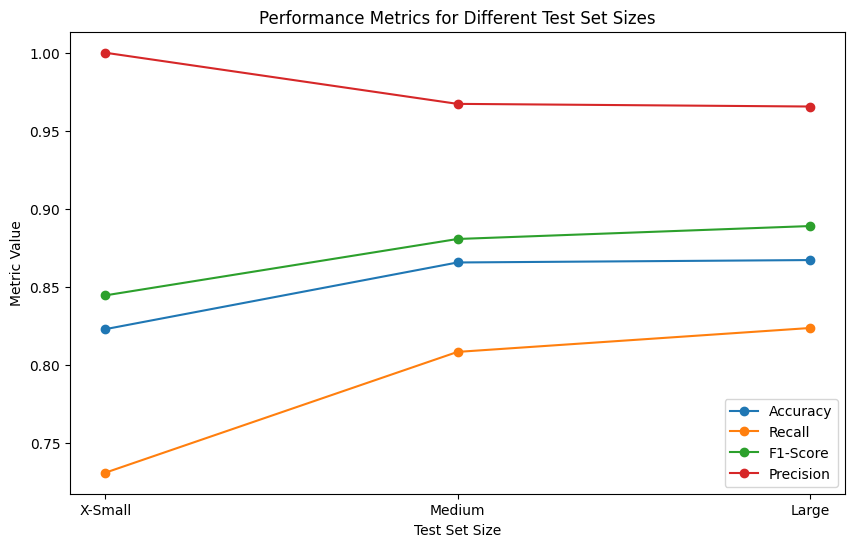

In [22]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
metrics_df_transposed = metrics_df.set_index('Test Set').transpose()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric with a different color
for metric in metrics_df_transposed.index:
  ax.plot(metrics_df_transposed.columns, metrics_df_transposed.loc[metric], marker='o', label=metric)

# Customize the plot
ax.set_xlabel("Test Set Size")
ax.set_ylabel("Metric Value")
ax.set_title("Performance Metrics for Different Test Set Sizes")
ax.legend()

# Show the plot
plt.show()


## Methodology (11)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - Train the KNN model on the training set.
  - Predict final grades on the test set.
  - Evaluate performance
3. Linear Regression:
  - __Fit a Linear Regression model to the training data.__
  - Predict final grades on the test set.
  - Evaluate performance

In [23]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression models
linear_reg_xsmall = LinearRegression()
linear_reg_medium = LinearRegression()
linear_reg_large = LinearRegression()

# Fit the models to the training data
linear_reg_xsmall.fit(X_train_xsmall, y_train_xsmall)
linear_reg_medium.fit(X_train_medium, y_train_medium)
linear_reg_large.fit(X_train_large, y_train_large)


LinearRegression()

## Methodology (12)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - Train the KNN model on the training set.
  - Predict final grades on the test set.
  - Evaluate performance
3. Linear Regression:
  - Fit a Linear Regression model to the training data.
  - __Predict final grades on the test set.__
  - Evaluate performance

In [24]:
# Predict G3 on the test sets using the fitted Linear Regression models
y_pred_linear_xsmall = linear_reg_xsmall.predict(X_test_xsmall)
y_pred_linear_medium = linear_reg_medium.predict(X_test_medium)
y_pred_linear_large = linear_reg_large.predict(X_test_large)


## Methodology (13)

1. Data Preprocessing:
  - Load the dataset and inspect for missing values.
  - Encode categorical variables (e.g., Family Support).
  - Normalize numerical features for KNN.
  - Split the dataset into training (80%) and testing (20%) sets. (Record)
  - Split the dataset into training (70%) and testing (30%) sets. (Record)
  - Split the dataset into training (60%) and testing (40%) sets. (Record)
2. K-Nearest Neighbors (KNN):
  - Determine an optimal value for K (number of neighbors).
  - Train the KNN model on the training set.
  - Predict final grades on the test set.
  - Evaluate performance
3. Linear Regression:
  - Fit a Linear Regression model to the training data.
  - Predict final grades on the test set.
  - __Evaluate performance__

In [25]:
# With y_pred_linear_xsmall, y_pred_linear_medium, y_pred_linear_large
# variables already defined,
# and the calculate_metrics function defined too,s

linear_metrics_xsmall = calculate_metrics(y_test_xsmall, y_pred_linear_xsmall)
linear_metrics_medium = calculate_metrics(y_test_medium, y_pred_linear_medium)
linear_metrics_large = calculate_metrics(y_test_large, y_pred_linear_large)

# Create a DataFrame to store the metrics
linear_metrics_df = pd.DataFrame({
    'Test Set': ['X-Small', 'Medium', 'Large'],
    'Accuracy': [linear_metrics_xsmall[0], linear_metrics_medium[0], linear_metrics_large[0]],
    'Recall': [linear_metrics_xsmall[1], linear_metrics_medium[1], linear_metrics_large[1]],
    'F1-Score': [linear_metrics_xsmall[2], linear_metrics_medium[2], linear_metrics_large[2]],
    'Precision': [linear_metrics_xsmall[3], linear_metrics_medium[3], linear_metrics_large[3]]
})

# Combine KNN and Linear Regression metrics for a complete comparison
combined_metrics_df = pd.DataFrame({
    'Test Set': ['X-Small', 'Medium', 'Large'],
    'KNN Accuracy': [metrics_xsmall[0], metrics_medium[0], metrics_large[0]],
    'KNN Recall': [metrics_xsmall[1], metrics_medium[1], metrics_large[1]],
    'KNN F1-Score': [metrics_xsmall[2], metrics_medium[2], metrics_large[2]],
    'KNN Precision': [metrics_xsmall[3], metrics_medium[3], metrics_large[3]],
    'LinReg Accuracy': [linear_metrics_xsmall[0], linear_metrics_medium[0], linear_metrics_large[0]],
    'LinReg Recall': [linear_metrics_xsmall[1], linear_metrics_medium[1], linear_metrics_large[1]],
    'LinReg F1-Score': [linear_metrics_xsmall[2], linear_metrics_medium[2], linear_metrics_large[2]],
    'LinReg Precision': [linear_metrics_xsmall[3], linear_metrics_medium[3], linear_metrics_large[3]],
})


print(combined_metrics_df)


  Test Set  KNN Accuracy  KNN Recall  KNN F1-Score  KNN Precision  \
0  X-Small      0.822785    0.730769      0.844444       1.000000   
1   Medium      0.865546    0.808219      0.880597       0.967213   
2    Large      0.867089    0.823529      0.888889       0.965517   

   LinReg Accuracy  LinReg Recall  LinReg F1-Score  LinReg Precision  
0         0.835443       0.750000         0.857143               1.0  
1         0.848739       0.753425         0.859375               1.0  
2         0.835443       0.745098         0.853933               1.0  


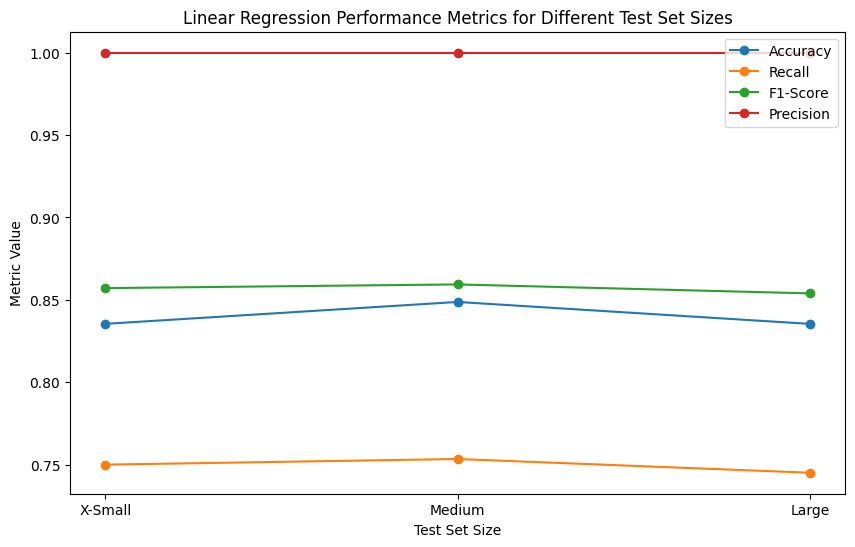

In [26]:
# Transpose the DataFrame for easier plotting
linear_metrics_df_transposed = linear_metrics_df.set_index('Test Set').transpose()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric with a different color
for metric in linear_metrics_df_transposed.index:
  ax.plot(linear_metrics_df_transposed.columns, linear_metrics_df_transposed.loc[metric], marker='o', label=metric)

# Customize the plot
ax.set_xlabel("Test Set Size")
ax.set_ylabel("Metric Value")
ax.set_title("Linear Regression Performance Metrics for Different Test Set Sizes")
ax.legend()

# Show the plot
plt.show()


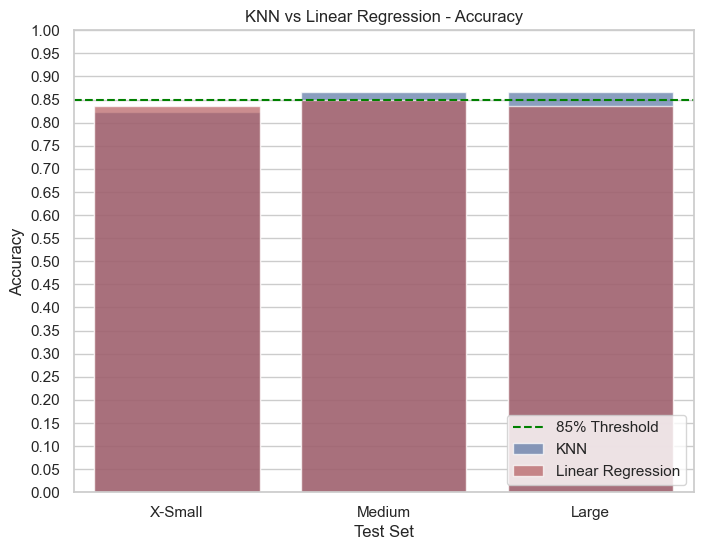

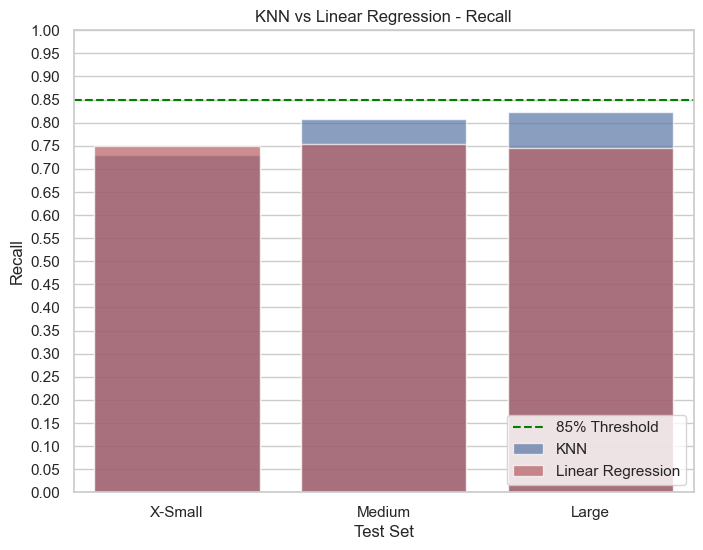

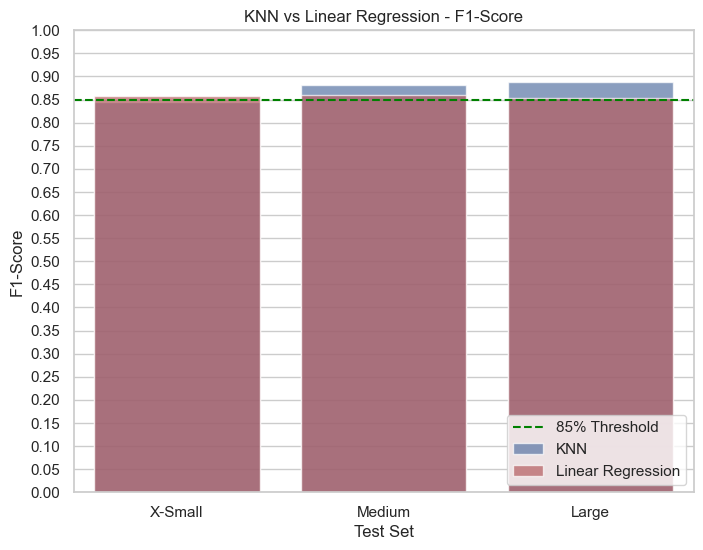

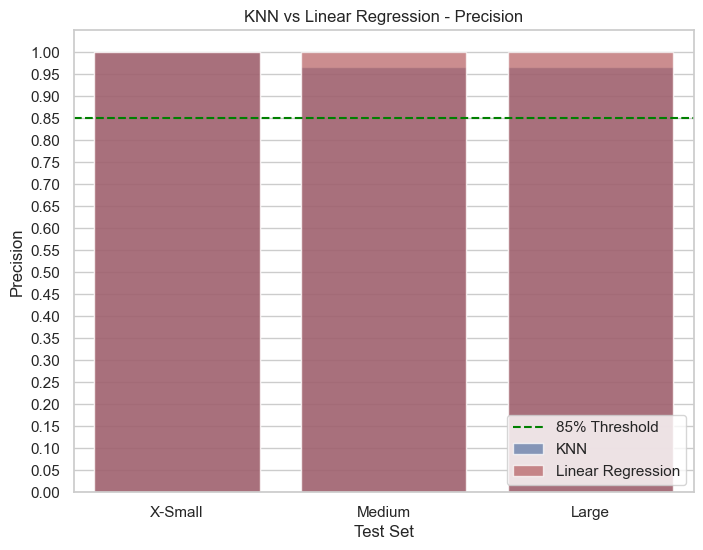

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualization
sns.set(style="whitegrid")

# Metrics to plot
metrics = ['Accuracy', 'Recall', 'F1-Score', 'Precision']

# Loop through each metric and plot grouped bar plots
for metric in metrics:
    plt.figure(figsize=(8, 6))
    
    # Create the grouped bar plot
    sns.barplot(x='Test Set', y=f'KNN {metric}', data=combined_metrics_df, color='b', label='KNN', alpha=0.7)
    sns.barplot(x='Test Set', y=f'LinReg {metric}', data=combined_metrics_df, color='r', label='Linear Regression', alpha=0.7)
    
    # Add labels and title
    plt.title(f'KNN vs Linear Regression - {metric}')
    plt.ylabel(f'{metric}')
    
    # Customize y-axis with increments of 0.05
    plt.yticks(np.arange(0, 1.05, 0.05))
    
    # Add a threshold line at 0.85
    plt.axhline(0.85, color='green', linestyle='--', label='85% Threshold')
    
    # Move the legend to the bottom-right, outside the plot area
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=1, frameon=True)

    # Display the plot
    plt.show()


## Analysis and Conclusion

### Implementing the Models

In the first few steps of the Methodology section, we preprocessed the data by checking for entities with unexpected missing values (of which, luckily, there was none), adding new data columns by extrapolating from existing ones (such as Attendance percentage from the number of Absences per student), and converted the categorical Family Support variable into a numerical one.

These steps are important to allow the *k*-nearest neighbors (KNN) algorithm to absorb our dataset and train a prediction model. We are tasked to implement two of these models three times: thrice using the linear regression algorithm and thrice using the KNN algorithm, each with different testing set sizes.

### Evaluating Model Performance

As seen in the last section of our notebook, labeled __Methodology (13)__, we compiled the different metrics that resulted in the creation and use of our predictive models, which we can once again run as follows:

In [32]:
print(combined_metrics_df)

  Test Set  KNN Accuracy  KNN Recall  KNN F1-Score  KNN Precision  \
0  X-Small      0.822785    0.730769      0.844444       1.000000   
1   Medium      0.865546    0.808219      0.880597       0.967213   
2    Large      0.867089    0.823529      0.888889       0.965517   

   LinReg Accuracy  LinReg Recall  LinReg F1-Score  LinReg Precision  
0         0.835443       0.750000         0.857143               1.0  
1         0.848739       0.753425         0.859375               1.0  
2         0.835443       0.745098         0.853933               1.0  


Our instructor, Mr. Rolando B. Barrameda, Associate Dean at the College of Information and Computer Studies (CICS), generally requests for an 85% accuracy score when training models, and two out of the six fit the requirement: the KNN models with either a medium (30%) test size or a large (40%) test size.

While the KNN models noticeably fared better once the size of the testing set was ramped up from 20% to 30%, the linear regression algorithmic models did not change in their performance, with the differences between the three models fitting inside a typical margin of error of somewhere between 2–3%.

### Comparison between Regression and Classification

The *k*-nearest neighbors algorithm works best with a more balanced ratio between the training set and the testing set, hence the `train_test_split` function from scikit-learn having a default value of 25%. Training models that are too large (i.e. the KNN model with Extra Small test set) end up overfitting, as those models absorb what would tend to be outliers in the training set and incorporate them into their predictions.

However, predictive models with smaller training sets (such as KNN Medium and KNN Large) sacrificed precision for better accuracy and recall. Precision works by counting true positive values as a percentage of all values that a model predicted as positive, which turned out more difficult with less data to absorb.

On the other hand, while the linear regression models had better performance than the lowest extremes of our KNN models, they too failed to raise their accuracy levels to the point they can compete with KNN models of smaller training sets. Our linear regression models did not deviate much from each other — all having a difference of just up to ±1.5%.

### Conclusion

The linear regression and KNN classification algorithms are some of the methods available to predict future values by training existing datasets. Whether one or the other is more appropriate depends on the provided dataset and the expected outcomes and tradeoffs a data scientist may have.

For smaller training sets, our KNN classifiers delivered better accuracy and recall at the expense of precision. On the other hand, the regressor models worked better all-around for our 395-entity database due to their ability to maintain consistent performance across varying test set sizes, though they struggled to meet the 85% accuracy threshold required by our instructor.

## Rubrics:

Criteria | Excellent (4 points) | Good (3 points) | Fair (2 points) | Poor (1 point) | Score
-----|-----|-----|-----|-----|-----
**Data Preprocessing** | Thoroughly cleaned and normalized data, handled missing values effectively. | Data cleaning and normalization mostly done, minor issues present. | Some preprocessing done, but significant issues remain. | Little to no preprocessing done.
**Model Implementation** | Models implemented correctly with clear and efficient code. | Models implemented with minor errors; code mostly clear. | Models implemented but with several errors; code lacks clarity. | Models not implemented or largely incorrect. | 
**Performance Evaluation** | Comprehensive evaluation using multiple metrics; results are well presented. | Evaluation includes key metrics; results are mostly clear. | Basic evaluation done; metrics may be incomplete or unclear. | Little to no evaluation conducted. | 
**Analysis and Comparison** | Detailed comparison of model performance with insightful analysis. | Good comparison of models, but analysis could be deeper. | Basic comparison made, but lacks depth or insight. | No meaningful comparison provided. | 
**Conclusion** | Clear and insightful conclusions drawn from the results. | Conclusions are mostly clear, but lack depth. | Basic conclusions made, but unclear or unsupported. | No conclusions drawn or are irrelevant. | 